# Pressure

## Data loading

In [1]:
!ls

Andersen1974.pdf           __pycache__
Dissertation contract.pdf  data
Fahlmann_Ulrych_1982.pdf   hodgevj4.pdf
Image-4.jpeg               main.md
Preliminaries              pressure_check-Copy1.ipynb
Preliminaries.pdf          pressure_check.ipynb
Preliminaries.zip          s41586-021-03854-z.pdf
README.md                  temp.py


In [2]:
import os
import numpy as np
import pandas as pd



df=pd.DataFrame();
def Create_df(name):
    
    
    df= pd.DataFrame(np.loadtxt(name), columns=['station','timestamp','min', 'max'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y%m%d%H%M')
    #df.describe()
    #df['station'].unique()
    df['file_type']= dirname

    #print(df)

    return df

for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        if 'Press' in filename:
            #print(dirname+filename)
            df2=Create_df(str(dirname+'/'+filename))
            df=df.append(df2, ignore_index=True)

        
df['min']=df['min'].replace(0, np.nan)        
df['max']=df['max'].replace(0, np.nan) 

print(df)


        station           timestamp     min     max            file_type
0        4201.0 1997-05-31 00:00:00  1004.8  1008.6           data/Carra
1        4201.0 1997-05-31 01:00:00  1004.8  1008.6           data/Carra
2        4201.0 1997-05-31 02:00:00  1004.7  1008.5           data/Carra
3        4201.0 1997-05-31 03:00:00  1004.6  1008.4           data/Carra
4        4201.0 1997-05-31 04:00:00  1004.3  1008.1           data/Carra
...         ...                 ...     ...     ...                  ...
197599   6193.0 1997-06-01 09:00:00  1025.9  1027.3  data/data1/combined
197600   6193.0 1997-06-01 12:00:00  1025.0  1026.3  data/data1/combined
197601   6193.0 1997-06-01 15:00:00  1024.5  1025.8  data/data1/combined
197602   6193.0 1997-06-01 18:00:00  1023.6  1024.9  data/data1/combined
197603   6193.0 1997-06-01 21:00:00  1022.9  1024.2  data/data1/combined

[197604 rows x 5 columns]


In [3]:
print(df['file_type'].unique())

['data/Carra' 'data/data1/NYdata' 'data/data1/combined']


We are mainly interested on stations that belong to crude data-bases. Therefore we separate Carra data (checked manually) from the rest of the database 

In [4]:
df_true= df[df['file_type']=='data/Carra']

df=df[df['file_type']=='data/data1/combined']

In [5]:
df['station'].unique()[:]

#TO DO: find location of the stations for spatial correlation study

array([4201., 4202., 4203., 4207., 4208., 4210., 4214., 4217., 4220.,
       4221., 4228., 4230., 4231., 4242., 4250., 4253., 4260., 4261.,
       4266., 4270., 4272., 4285., 4301., 4310., 4312., 4313., 4320.,
       4330., 4339., 4351., 4360., 4382., 4390., 5700., 6005., 6009.,
       6010., 6011., 6024., 6030., 6034., 6041., 6043., 6048., 6052.,
       6058., 6060., 6070., 6071., 6075., 6079., 6080., 6081., 6096.,
       6104., 6108., 6110., 6119., 6120., 6124., 6142., 6143., 6149.,
       6151., 6153., 6159., 6160., 6165., 6168., 6169., 6170., 6180.,
       6181., 6184., 6190., 6191., 6193., 6100.])

In [6]:
df

,station,timestamp,min,max,file_type
129971,4201.0,1997-05-31 00:00:00,1004.8,1008.6,data/data1/combined
129972,4201.0,1997-05-31 01:00:00,1004.8,1008.6,data/data1/combined
129973,4201.0,1997-05-31 02:00:00,1004.7,1008.5,data/data1/combined
129974,4201.0,1997-05-31 03:00:00,1004.6,1008.4,data/data1/combined
129975,4201.0,1997-05-31 04:00:00,1004.3,1008.1,data/data1/combined
...,...,...,...,...,...
197599,6193.0,1997-06-01 09:00:00,1025.9,1027.3,data/data1/combined
197600,6193.0,1997-06-01 12:00:00,1025.0,1026.3,data/data1/combined
197601,6193.0,1997-06-01 15:00:00,1024.5,1025.8,data/data1/combined
197602,6193.0,1997-06-01 18:00:00,1023.6,1024.9,data/data1/combined


# Series visualization

Let's start getting an idea of the data we are dealing with by making a representation of a single value (e.g pressure) for all the stations available 

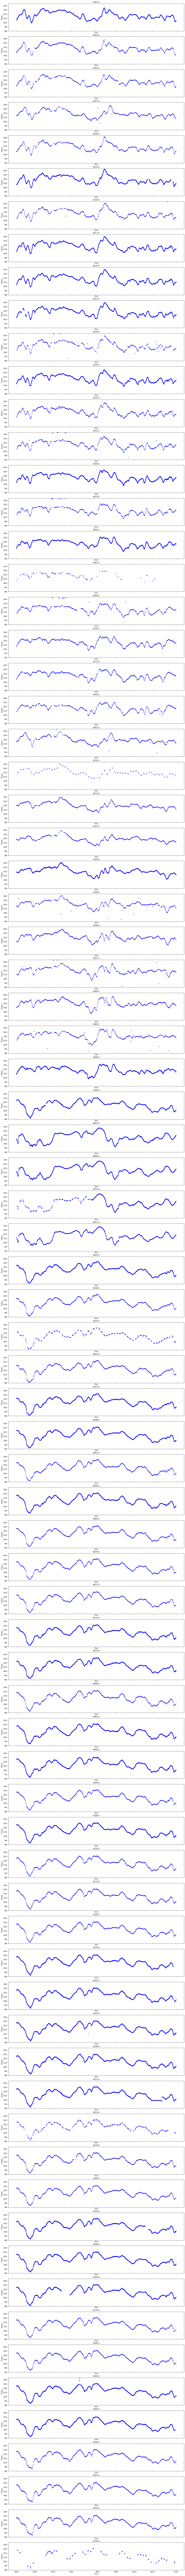

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as md

#import matplotlib.axis.Axis as axis

stations= df['station'].unique()[:]
fig, ax = plt.subplots(len(stations), figsize=(20,300), sharex=True)
for i in range(len(stations)):
    df2=df[df['station']==stations[i]]
    
    ax[i].plot(df2['timestamp'],df2['max'], 'b.')
    ax[i].set_ylim(980, 1045)
    ax[i].xaxis.set_major_formatter(md.DateFormatter('%m/%d'))
    ax[i].set_title(str(stations[i]))
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel("P(hpa)")


    #plt.plot(df2['timestamp'],df2['min'])
    del(df2)


Clearly there seems to be the spatial correlation between the different stations and the temporal correlation between the same station. Let's start by playing with the time coherence of the individual series, without paying attention to the neighbours

# Ground truth


In [8]:
def obtain_outliers(correct, crude):
    
    outliers=pd.concat([crude.drop('file_type'), correct.drop('file_type'), correct.drop('file_type')]).drop_duplicates(keep=False)
    
    return outliers


station=4228

#print(obtain_outliers(df_true[df_true['station']==station], df[df['station']==station]))
 
#print(df_true[df_true['station']==station].drop(labels='file_type',axis=1))


corrections_press_min= df_true[(df_true['min'] == -1)]

#for row in corrections_pressure_max.iterrows():

#error_values=df[corrections['timestamp'].equals(df['timestamp'])]

flagged=pd.DataFrame()
for row in corrections_press_min.iterrows():
    flagged=flagged.append(df[(df['station']==row[1]['station']) & (df['timestamp']==row[1]['timestamp'])&(df['min']!=row[1]['min']) ])
    
#flagged= pd.DataFrame(flagged)
      

In [9]:
print(flagged)


        station           timestamp     min     max            file_type
130266   4312.0 1997-05-31 06:00:00  1005.8  1010.9  data/data1/combined
131399   4313.0 1997-06-30 06:00:00  1009.3  1010.6  data/data1/combined
131433   4330.0 1997-06-30 15:00:00  1048.1  1053.7  data/data1/combined
132514   4330.0 1997-06-14 18:00:00   992.6   998.1  data/data1/combined
133317   4203.0 1997-05-15 06:00:00  1045.4  1047.1  data/data1/combined
...         ...                 ...     ...     ...                  ...
195788   4382.0 1997-05-19 21:00:00  1042.3  1048.4  data/data1/combined
196517   4207.0 1997-06-01 03:00:00  1018.3  1031.6  data/data1/combined
196523   4207.0 1997-06-01 21:00:00   982.6   995.5  data/data1/combined
196641   4228.0 1997-06-01 15:00:00  1010.7  1012.1  data/data1/combined
196856   4382.0 1997-06-01 21:00:00  1033.8  1038.8  data/data1/combined

[345 rows x 5 columns]


In [10]:
print(flagged.station.unique())
print(df['station'].unique()[:])


[4312. 4313. 4330. 4203. 4207. 4228. 4285. 4351. 4382. 4266. 4208. 4214.
 4242. 4253. 4301. 4270. 6159. 6151. 4250. 6181.]
[4201. 4202. 4203. 4207. 4208. 4210. 4214. 4217. 4220. 4221. 4228. 4230.
 4231. 4242. 4250. 4253. 4260. 4261. 4266. 4270. 4272. 4285. 4301. 4310.
 4312. 4313. 4320. 4330. 4339. 4351. 4360. 4382. 4390. 5700. 6005. 6009.
 6010. 6011. 6024. 6030. 6034. 6041. 6043. 6048. 6052. 6058. 6060. 6070.
 6071. 6075. 6079. 6080. 6081. 6096. 6104. 6108. 6110. 6119. 6120. 6124.
 6142. 6143. 6149. 6151. 6153. 6159. 6160. 6165. 6168. 6169. 6170. 6180.
 6181. 6184. 6190. 6191. 6193. 6100.]


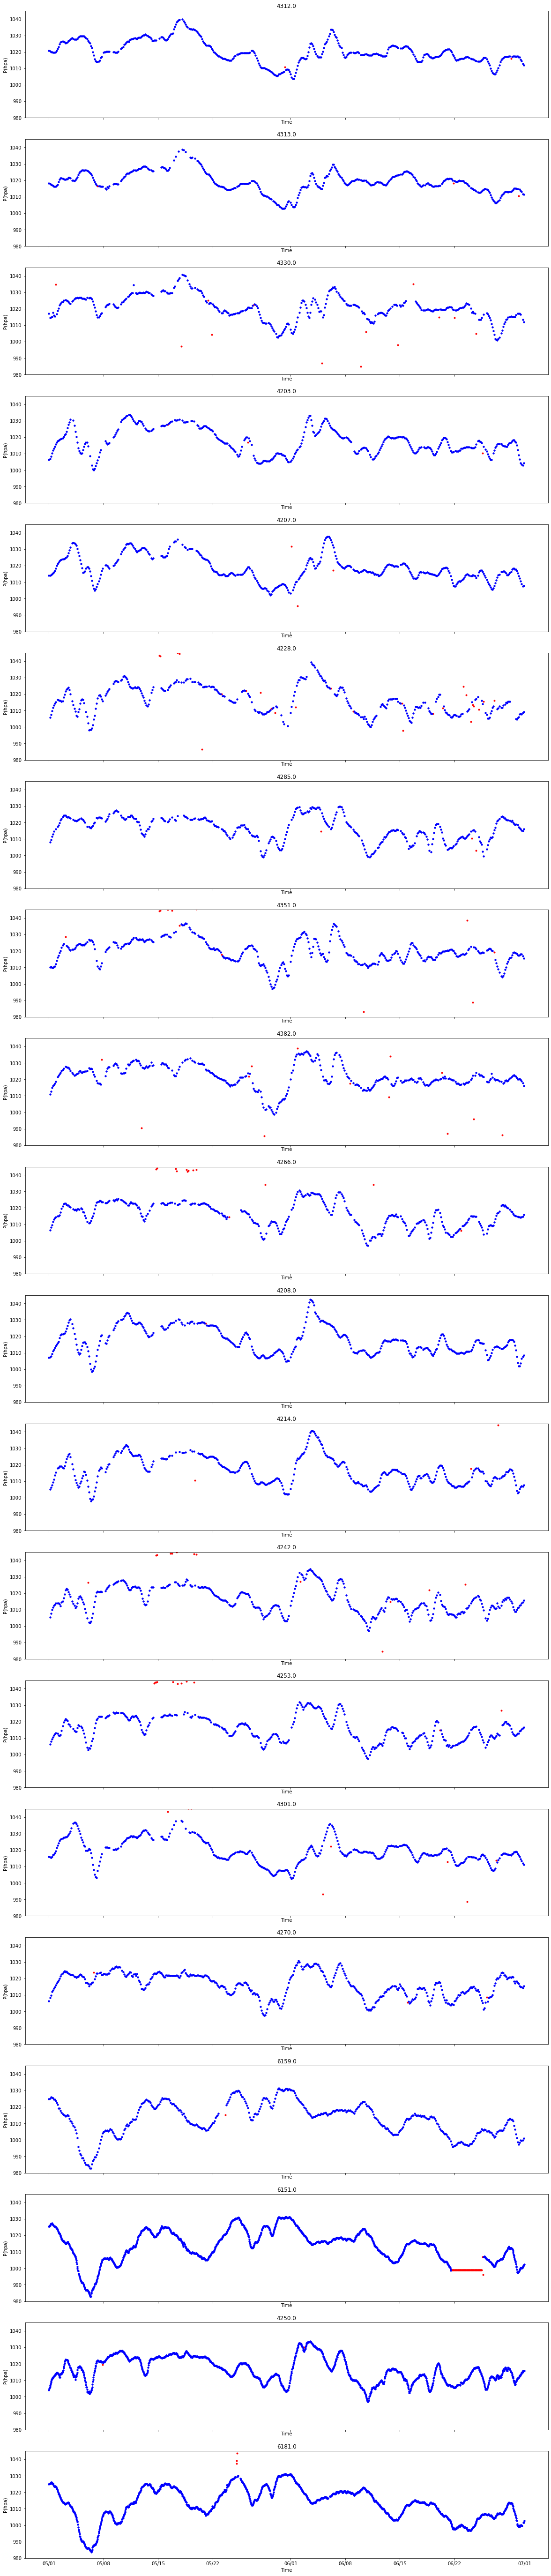

In [11]:
stations= flagged['station'].unique()[:]
fig, ax = plt.subplots(len(stations), figsize=(20,100), sharex=True)
for i in range(len(stations)):
    df2=df_true[df_true['station']==stations[i]]
    
    ax[i].plot(df2['timestamp'],df2['max'], 'b.')
    
    df3=flagged[flagged['station']==stations[i]]
    
    ax[i].plot(df3['timestamp'],df3['max'], 'r.')
    
    
    ax[i].plot(df2['timestamp'],df2['max'], 'b.')
    ax[i].set_ylim(980, 1045)
    ax[i].xaxis.set_major_formatter(md.DateFormatter('%m/%d'))
    ax[i].set_title(str(stations[i]))
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel("P(hpa)")


    #plt.plot(df2['timestamp'],df2['min'])
    del([df2,df3])


The following is a useful function that fits a cubic spline to our series. It will be handy afterwards to create x, y pairs and resize the length and resolution of the series when needed: 

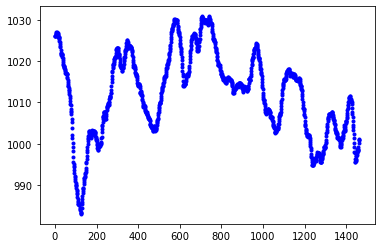

In [12]:
from scipy.interpolate import interp1d
def create_sets(station, df=df):
    """
    Parameters
    ----------
        - station: Station ID used for computation
        - df: dataframe from which the data has to be queried
        
    Outputs
    -------
        - x: Time stamps of the station 
        - f: Cubic spline closure to get the y value by interpolation at any given time.  
    """
    df2=df[df['station']==station]

    x=df2['timestamp']
    y=df2['max']

    x = x.to_numpy('float64')
    y = y.to_numpy('float64')

    X = np.array([x,y])
    X= X.T
    X=X[X[:, 0].argsort()]
    x= X[:,0]
    y= X[:,1]

    f= interp1d(x, y, kind='cubic', fill_value='extrapolate' )
    
    return x,f
x, f= create_sets(6096)

y=f(x)
for i in range(len(y)):
    plt.plot(i, y[i], 'b.')

# DBSCAN 

In order to detect candidate outliers we apply DBSCAN. This clustering technique regroups points in clusters by proximity and considers outliers the points without neighbours around. This technique does not require us to specify a number of clusters but does require though to tune hyperparameters such as the minimum distance between points for being considered a cluster or the minimum number of points per cluster. Moreover the metric used by the algorithm is euclidean but we are working with different features (i.e time-stamp and pressure). In this case we have to rescale both features in order to allow an euclidean distance computation. For this rescale we divided our pressure and timestamp by the standard deviation of the stepsize distribution along each axis.

We begin by testing our method within one station:

In [13]:
from sklearn.cluster import DBSCAN

def time_consistency_test(station):
    """
    Parameters
    ----------
        - station: objective station from which the time-series points will be clustered
    Output
    ------
        - predict: closure functiuon that evaluates wether a given point belongs to a cluster or not
    """
    
    x, f= create_sets(station)
    y=f(x)

    X = np.array([x,y])
    X= X.T

    y_steps= [y[i+1]-y[i] for i in range(len(y)-1)]
    x_steps= [x[i+1]-x[i] for i in range(len(x)-1)]

    scaling_factor_y=abs(max(X[:,1])- min(X[:,1]))*10
    scaling_factor_x=max(X[:,0])- min(X[:,0])

    X[:,0]/=scaling_factor_x
    X[:,1]/=scaling_factor_y

    def predict(x, y):
        """
            Parameters
            ----------
                - (x,y): set of points that define the time-series
            Output
            ------
                - Boolean: test result (True/False)  
            TODO
            ----
                - Turn it into computationally efficient. Remove points for calculation
        """
        
        X_aux=np.array([[x,y]])
        X_aux[:,0]/=scaling_factor_x
        X_aux[:,1]/=scaling_factor_y
        
        X_new=np.append(X,X_aux, axis=0)
        
        labels = DBSCAN(eps=0.01,min_samples=5, metric='euclidean').fit_predict(X_new)
        
        
        del(X_new)
        
        if(labels[-1]==-1):
            return True
        else:
            return False
    return predict


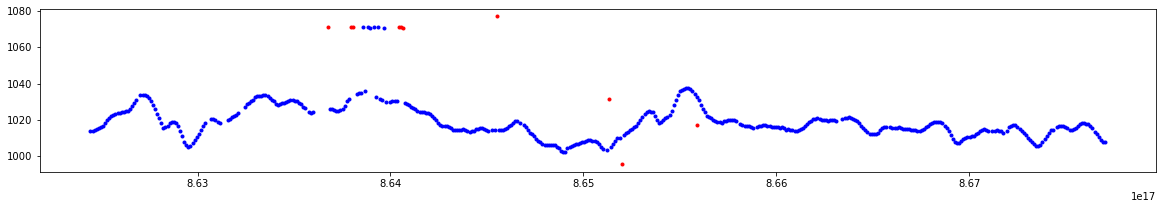

In [14]:
plt.figure(figsize=(20,3))

my_station=4207

clust=  time_consistency_test(my_station)

x,f= create_sets(my_station)
y= f(x)

for i in range(len(x)):
    if (clust(x[i], y[i])==True):
        plt.plot(x[i], f(x[i]), 'r.')
    else:
        plt.plot(x[i], f(x[i]), 'b.')

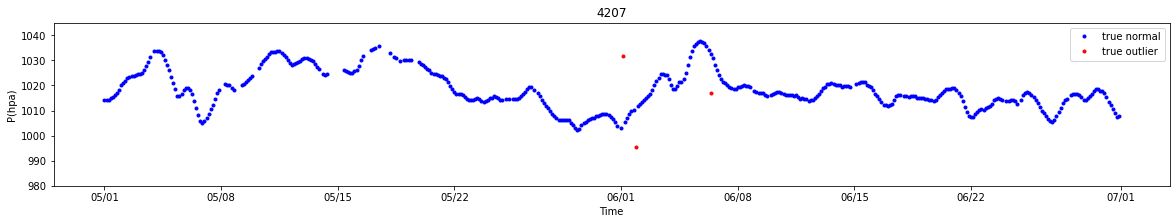

In [15]:
fig, ax = plt.subplots(1, figsize=(20,3), sharex=True)

df2=df_true[df_true['station']==my_station]
df3=flagged[flagged['station']==my_station]

ax.plot(df2['timestamp'],df2['max'], 'b.', label='true normal')
ax.plot(df3['timestamp'],df3['max'], 'r.', label='true outlier')

ax.set_ylim(980, 1045)
ax.xaxis.set_major_formatter(md.DateFormatter('%m/%d'))
ax.set_title(str(my_station))
ax.set_xlabel('Time')
ax.set_ylabel("P(hpa)")
ax.legend(loc='best')



In general, it seems that DBSCAN is able to successfully flag outliers in a time distance-wise. Nevertheless some points that are suspiciously outlying the trend are not flag as such. On the other hand, points that are really close to the trend appear tagged as outlying. Two solutions are possible to remediate to this: a better hyperparameter tuning, which can be performed by systematic trials and comparison with Bjarne's work and a combination of DBSCAN with other methods based on different criteria. 

Tests to implement: 
- Physical coherence

TODO:
- Find the optimal hyperparameters for each station

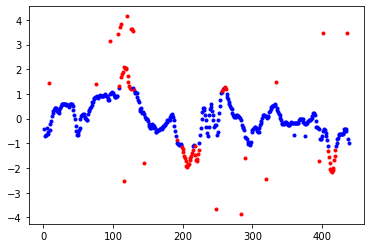

In [16]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
x,f= create_sets(4330)
y= f(x)
y=(y-np.mean(y))/np.std(y)
y=np.expand_dims(y,axis=1)
#print(y)
#X = np.array([x,y]).T
#X= StandardScaler().fit_transform(X)
#print(X)
clf = IsolationForest(random_state=0).fit(y)
i=0
for t in y:
    i+=1
    if (clf.predict([t])== -1):
        plt.plot(i,t, 'r.')
    else:
        plt.plot(i,t, 'b.')


# Cross correlation between time-series

A possible first step in order to build a comparison algorithm is to create a criterion that helps us choosing which stations are valid for comparison with ours. Many criterion are possible but we think that a correlation measurement is the most appropriate as it is empirical (driven by previous records) is affected not only by distance but also by physical phenomena (precipitations) and topology (mountains or flat zones). 


If there is a correlation between signals this has to be linear. We do not imagine for example the temperature of the station increase as the square of another's.

The correlation score that we assign to our signals (namely f and g) is based on the maximum of the cross correlation of the signals. Since the granularity of the signals is irregular we interpolate the signals with a cubic spline (matches the 1st and 2nd derivative at the knots). Morover we normalize and standarize the signals before calculating the correlations 

$$\rho(f,g)=max((f'*g')(t))=(f'*g')(0)  $$
where $$f'=interp \left( \frac{f - \bar{f}}{\sigma_{f}}\right) $$

An example of how we find the correlation is shown below:

![convolution](https://user-images.githubusercontent.com/57238320/154990195-2628d622-8c88-41e5-8298-5d8fdb3d12d0.png)


<AxesSubplot:>

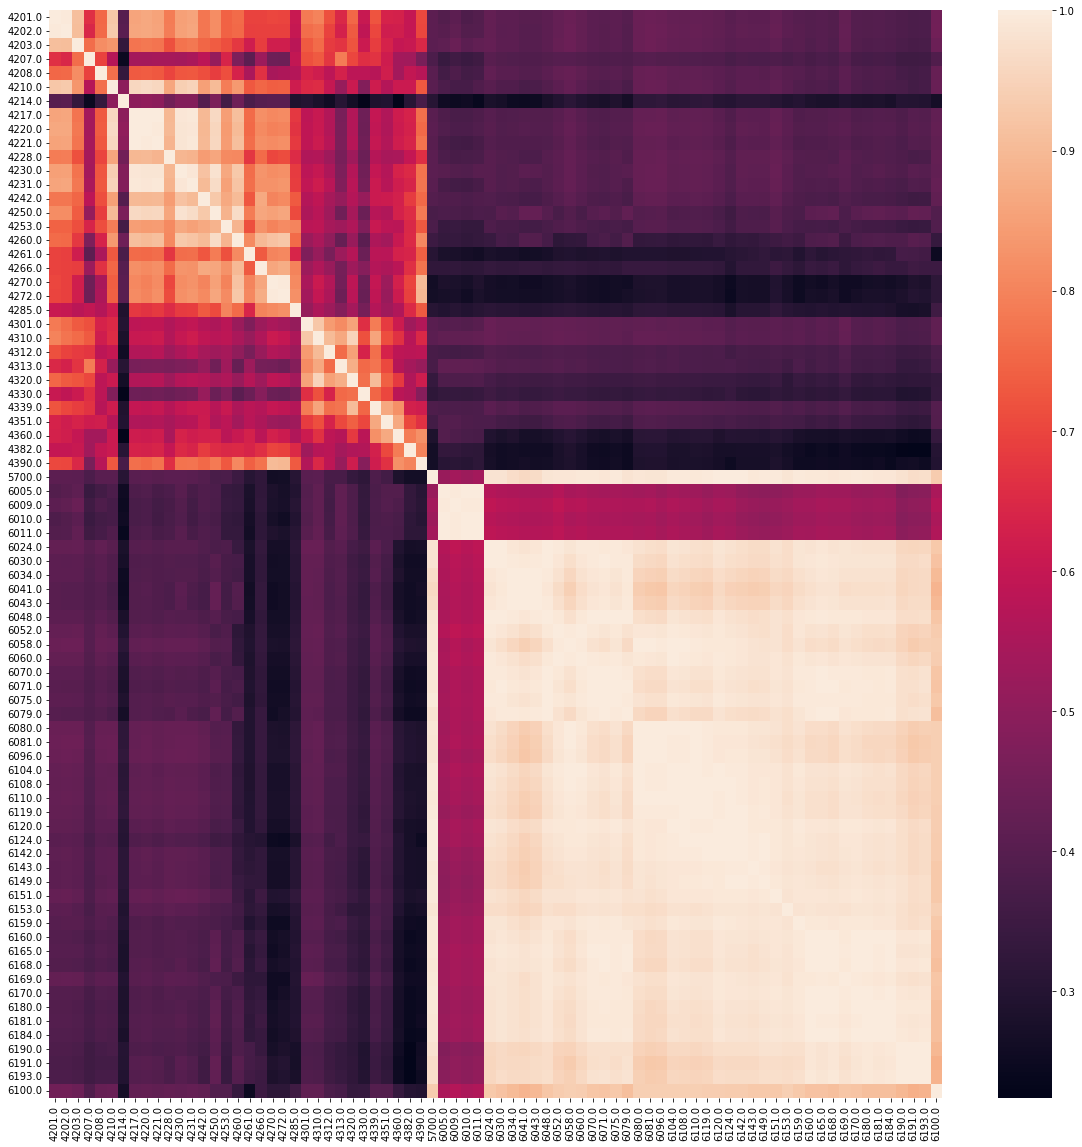

In [17]:
import scipy.signal as signal

def correlate_signals(station1, station2, num=100000):  
    """
    Parameters
    ----------
        - (station1,station2): pair of stations for which the correlation score is to be computed
        - num: length of the arrays created by interpolation of the stations time-series. Default=100000 points.    
    Otuputs
    -------
        - lags
    """

    
    x1, f1= create_sets(station1)
    x2, f2= create_sets(station2)
    
    xrange=np.linspace(max(min(x1),min(x2)), min(max(x1),max(x2)), num)
    
    a= f1(xrange)
    b= f2(xrange)

    a= (a - np.mean(a)) / (np.std(a) * num)
    b= (b - np.mean(b)) / (np.std(b) * num)
    corr = signal.correlate(a,b)
    corr*=len(a) #Does this make sense?
    lags = signal.correlation_lags(len(a), len(b))
    
    return lags,corr


stations=df['station'].unique()

stations_correlations= np.zeros((len(stations),len(stations)))

for i in range(len(stations)):
   for j in range(len(stations)):
       _, corr=correlate_signals(stations[i],stations[j], 10000)
       
       stations_correlations[i,j]= max(corr)
        
import seaborn as sns;
plt.figure(figsize=(20,20))
sns.heatmap(stations_correlations, xticklabels=stations, yticklabels=stations)


From here we can proceed to create an algorithm that compare a given station with the ones with which the correlation score is the highest. Furthermore we can weight the contribution of a station to the decision with the correlation score.

# Spatial comparison implementation
Now that we built a correlation map, we can try to implement a method based on the comparison within the most correlated stations. A first simple approach is to profile the distribution of differences within the same station and then calculate the probability that a new point is an outlier. Mathematically it is equivalent to assume that 

$$P(x|y)\equiv P(x-y)$$




In [18]:

from scipy.stats import gaussian_kde

def create_probability(station,target_station, df=df):
    
    x1, f1= create_sets(station, df)
    x2, f2= create_sets(target_station, df)
    
    diff=[]
    
    for x in x1:
        diff.append(f2(x)-f1(x))
    return gaussian_kde(diff)

def build_pdfs(station,  thr=0.1, df=df):
    """
    Parameters
    ----------
        - station: station id from which to build the test
        - thr: score below which a station is labelled as outlier
        - df: dataframe used in the pdf computation
        
    Output
    -------
        - evaluate point: closure function that calculates the tests result
        - correlated stations: ID list of the stations used for the computation 
    """
    station_index= np.where(stations == station)[0][0]
    r_thr=1.
    correlated_stations= []
    
    r=[]

    while(r_thr>0.9 and len(correlated_stations)<11):
        correlated_stations= stations[stations_correlations[station_index,:]>r_thr]
        r= stations_correlations[station_index,stations_correlations[station_index,:]>r_thr]
        
        r_thr-=1e-5
        
    correlated_stations=np.delete(correlated_stations, np.where(correlated_stations == station) )
    r=np.delete(r, np.where(r == 1.) )
    
    pdfs=[]
    f2s=[]
    for target_station in correlated_stations:
        try:
            pdfs.append(create_probability(station,target_station,df))
            f2s.append(create_sets(target_station, df)[1])
            
            
        except:
            pdfs.append(None)
    
    if(len(correlated_stations)==0):
        print('no stations in the range ')
    def evaluate_point(x, y, thr, r=r):
        """
        Parameters
        ----------
            - (x,y): point coordinates in the time series of the station being analyzed
            - thr: score below which a station is labelled as outlier
            - r: correlation scores list
  
        Output
        -------
            - Boolean: test result (True/False)
        """
        output_prob=0.
        for i in range(len(correlated_stations)):
            #_, f2= create_sets(correlated_stations[i], df)

            diff=y-f2s[i](x)
            
            try:
                output_prob += pdfs[i].evaluate(diff)*(r[i])
            except:
                r=np.delete(r, i)
            
        output_prob/=sum(r)
        # I DON'T KNOW IF THIS IS THE PROBABILITY THAT MAKES SENSE 
        
        if (output_prob<thr):
            return True
        else:
            return False
    
    return evaluate_point, correlated_stations



In [19]:
#Example of two correlated and uncorrelated stations.

from temp import create_probability, build_pdfs

xrange=np.linspace(-10.,10., 10000)
#create_probability(4221,4220)

plt.figure()
#plt.title('Example of the probability distributions obtained through the first method')
plt.plot(xrange, create_probability(4220,4217).evaluate(xrange), label='strong')
plt.plot(xrange, create_probability(4220, 4214).evaluate(xrange), label='weak')
plt.xlabel('$\Delta p/hpa$')
plt.ylabel('$P(\Delta p)$')
plt.legend(loc='best', title='correlation')



NameError: name 'df' is not defined

In [ ]:
example_station= 4220


pdf, corr_stat=build_pdfs(example_station, thr=0.1)

fig, ax = plt.subplots(len(corr_stat)+1, figsize=(20,50), sharex=True)

for i in range(len(corr_stat)):
    df2=df[df['station']==corr_stat[i]]
    
    ax[i].plot(df2['timestamp'],df2['max'], 'b.')
    ax[i].set_ylim(980, 1045)
    ax[i].xaxis.set_major_formatter(md.DateFormatter('%m/%d'))
    ax[i].set_title(str(corr_stat[i]))
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel("P(hpa)")


    #plt.plot(df2['timestamp'],df2['min'])
    del(df2)

df2=df[df['station']==example_station]
ax[len(corr_stat)].plot(df2['timestamp'],df2['max'], 'b.')
ax[len(corr_stat)].set_ylim(980, 1045)
ax[len(corr_stat)].set_title('target station'+' '+str(example_station))

xs, f= create_sets(example_station) 

plt.figure(figsize=(20,5))
for x in xs:
    if pdf(x, f(x), 0.06):
        plt.plot(x, f(x), 'r.')
    else: 
        plt.plot(x, f(x), 'b.')
        
        



## Alternative probability calculation 

The plots make pretty much sense. If we have a linearly correlated station we expect that the difference will have a peak at a certain mean value. The less correlated the station is the smooth is the peak.

However I recently discovered that my first asumption is wrong and building the probability this way will complicate merging the outcome of many stations afterwards. Therefore I need to reformulate the pdf:

$$P(x|y)= \frac{P(x,y)}{P(y)}$$

but note that $x= x(t) $ and $y=y(t)$ so $P(x|y) = P(x|y)(t)$. We have to check how the probability built holds with time. This can be done with a drift study.

TODO
- Build the function that creates the joint probability and the conditional probability
- Create a drift study and find the optimal sampling set size.
- Merge the outcomes from the comparison of my station with other ones.
- Calculate the confusion matrix



In [ ]:
station_1= 4220
station_2= 4221
def create_joint_probability(x,y):
    
    t1, f1= create_sets(x)
    t2, f2= create_sets(y)
    
    y1= f1(t1)
    y2= f1(t2)
    
    print(y1.shape)
    
    
    return 

#create_joint_probability()

# Toy pressure gradient computation (Under development)

We compute the gradient of p(x,y) and use the geostrophic equation to compare the it to the wind magnitude field under the asumption of a perfect gas. 
  $$p= \rho RT $$
  $$\vec{v}= - \frac{1}{\rho} \nabla p \Longrightarrow \vec{v}= - RT \nabla \log{p} $$

In [ ]:
def divide(x):
    return int(x/100)

df3= pd.DataFrame(np.loadtxt('data/SynopFrIngres'),columns=['station', 'init', 'end', 'lat', 'lon', 'height'])

df3['station']= df3['station'].apply(divide)

positions= df3[['lat', 'lon']].values

my_station= 6075

def geostrophic_wind_computation(time):
    """
    Computes the gradient of the pressure field at a given time in order to find possible aberrant values for the wind
    
    Parameters
    ----------
        - time: timestamp of the gradient to calculate
    
    Outputs
    --------
        - (gradp_x, gradp_y): 2D gradient in cartesian(?) coordinates
        - x: point grid of the time-stamp
        
    
    TODO: 
        - Compute the wind from the gradient 
        - Compute the subsequent outlier classification based on aberrant values
    """
    
    x=[] ; y=[]; locs=[]
    
    for station in df3['station'].unique():
        if station in list(df['station']):
            _, f= create_sets(station)
            theta,phi= df3[df3['station']==station][['lat', 'lon']].values[0]*np.pi*1./180.
            x.append([theta,phi])
            #locs.append([theta, phi])
            y.append(float(f(time)))

    x=np.array(x)
    locs=np.array(locs)

    gradp_x= np.gradient(np.log(y), x[:,0])
    gradp_y= np.gradient(np.log(y), x[:,1])/np.sin(x[:,0])
    
    f= 7.2921e-5*2*np.sin(x[:,0]) 

    vx = gradp_x/f*np.sin(x[:,0])*np.cos(x[:,1])
    vy = gradp_y/f*np.sin(x[:,0])*np.sin(x[:,1])

    
    return gradp_x, gradp_y, x

x0=create_sets(my_station)[0][-25]

gradp_x, gradp_y, x= geostrophic_wind_computation(x0)

for i in range(len(gradp_x)):    
    plt.quiver(x[i,1], x[i,0],gradp_y[i], gradp_x[i],color=['b'])
argmax= np.argmax(np.sqrt(gradp_x*gradp_x+gradp_y*gradp_y))
plt.plot(x[argmax,1],x[argmax,0], 'r.' )

# Test of the tests

We have implemented a couple of tests that seem to be functional and seem to flag succesfully certain values. However we would like to have a numerical estimation of the performance of the tests on different cases. Concretly, in order to be merged in the bayesian framework for multiple evidence account, we want to calculate a confusion matrix. The approach that we could use is the one suggested by Dina which is inducing random artificial outliers on fragments of series which we are confident are ok. This values from the truth and ideally over a certain threshold (TBD) our tests should be able to flag them as outliers.



In [ ]:
def calculate_acc(x, f, test, params, n_trials= 100, std=1.5):
    
    """
    Parameters
    ----------
        - x and f: time series stamp and interpolator corresponding to the station to be evaluated
        - test: the test function to be benchmarked
        - params: the hyperparameters of the test
        - n_trials: number of synthetic anomalies to be generated for testing 
    
    Outputs:
    --------
        - Confusion matrix: [[True Postivies, False Negatives][False Positives, True Negatives]]
        
        
    TODO: Implement a version which is robust to initially corrupe
        
    """
    
    def create_outlier(y):
        
        """
        Parameters
        ----------
            - y: nominal value to be inputed
            - previous_status: previous inputation process (True or False)
        Outputs:
        --------
            - Confusion matrix: [[True Postivies, False Negatives][False Positives, True Negatives]]
            
        TODO
        ----
        Implement multiple sources of error for a better benchmark.
        """
        i= np.random.randint(0, len(y))
        
        out= 0. #2*std*np.random.rand()-std
        
        if(out<0.):
            out-=std
        else:
            out+=std 
        return i, out
    
    
    TP=0; FP=0; TN=0; FN=0;
    P=0; N=0;
    outlier_status=False
    
    y=f(x)
    for trial in range(n_trials):
        if(trial%2==0):
            idx_out, out = create_outlier(y)
            outlier_status=True
            
        else:
            idx_out, out, outlier_status= (np.random.randint(0, len(y)), 0., False)
        
        y[idx_out]+= out
    
        test_result= test(x[idx_out], y[idx_out], params)

        if(test_result==True and outlier_status==True):
            TP+=1
        elif(test_result==True and outlier_status==False):
            FP+=1
        elif(test_result==False and outlier_status==False):
            TN+=1
        elif(test_result==False and outlier_status==True):
            FN+=1
        
        y[idx_out]-= out
            
    TPR= TP/(TP+FN); TNR= TN/(TN+FP); FNR= FN/(TP+FN); FPR=FP/(TN+FP)
    confusion_matrix= np.array([[TPR, FNR],[FPR, TNR]])
    return confusion_matrix

In [ ]:
!pip install bayesian-optimization

In [ ]:
from bayes_opt import BayesianOptimization
from bayes_opt import SequentialDomainReductionTransformer
import time

# Bounded region of parameter space
pbounds = {'params': (0., .2)}

test,_ = build_pdfs(4242)

x, f = create_sets(4242)

plt.figure(figsize=(10,10))
def calculate_J(std=3., c='b.', label=None):
    def aux(params):
        confusion_matrix= calculate_acc(x,f,test, params,1000, std)
        J= 1 - confusion_matrix[0,0] + confusion_matrix[1,0]*1.98 #(confusion_matrix[0,0]+confusion_matrix[1,1])/(sum(sum(confusion_matrix)))
        plt.plot(confusion_matrix[1,0], confusion_matrix[0,0], c, label=label)
        return -J
    
    return aux

stds=[2., 1.5,1.]
colors=['r.', 'b.', 'g.']

for i in range(len(stds)):
    optimizer = BayesianOptimization(
        f=calculate_J(std=stds[i], c=colors[i], label='$\sigma = $'+str(stds[i])),
        pbounds=pbounds,
        random_state=1,
    )

    optimizer.maximize(
        init_points=50,
        n_iter=200,
    )
    
    print(calculate_acc(x,f,test, optimizer.max['params']['params'],1000, stds[i]))
    
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100), 'k--')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()



In [ ]:
res=optimizer.res

x=[];y=[]
for i in range(len(res)):
    x.append(optimizer.res[i]['params']['params'])
    y.append(optimizer.res[i]['target'])
    
plt.plot(x,y, 'b.', markersize=1.)
plt.xlabel('Threshold value')
plt.ylabel('J')

print(optimizer.max)

In [ ]:
print(optimizer.max)

In [ ]:
x, f = create_sets(4242)

def evaluate_acc(params):


    confusion_matrix= calculate_acc(x,f,test, params,10000,std=1.)
    
    print(confusion_matrix)

    acc= (confusion_matrix[0,0]+confusion_matrix[1,1])/(sum(sum(confusion_matrix)))
    return acc

test,_= build_pdfs(4242)
print(evaluate_acc(optimizer.max['params']['params']))

plt.figure(figsize=(20,3))



for xs in x:
    if test(xs, f(xs), optimizer.max['params']['params']):
        plt.plot(xs, f(xs),'r.')
    else:
        plt.plot(xs, f(xs),'b.')

# Questions

Questions on practice:

- In terms of hyperparameters of DBSCAN I have a big issue with normalization and standarization (give details).
- I NEED TESTS ROBUST TO THE FACT THAT A SERIES MAY NOT ALWAYS BE PERFECT. THEREFORE WOULD IT BE INTERESTING TO TRY TO SUBSTRACT THE CONFUSION MATRIX CALCULATED OVER THE SERIES WITHOUT OUTLIERS FROM THE SAME BUT WITH OUTLIERS?

Questions on bayesian framework:

- Is my bayesian framework a good approach? Should I reconsider the statistical asumptions under which it is built?
- What would happen if I try to generalize the approach and instead of picking one single station I build my framework for all the stations? Can I assume the expression and the tests to be generalisable? POSSIBLE ANSWER: Build on station by station
- If a test is based on other observations that are also being tested can I try to evaluate simultaneously the probability distribution of a measurement being outlier?. Possible answer: bayesian networks.


Test to implement:
- FOURIER
- PCA 




# Trash code




In [ ]:
"""
def create_outlier(std, station, n, df):

    length=df[df['station']==station].count()
    
    n=50; outliers=[]
    for i in range(n):
        out= 0.25*std
        while abs(out)<0.5*std:
            out= std*np.random.randn()
        x=df[df['station'] == station].index.values    
        np.random.shuffle(x)
        
        outliers.append(x[0])

        df.loc[x[0],'max']+=out
    
    return  df, outliers
"""
"""
def create_test(station):
    
    df_aux=df.copy()
    print('flag1')
    
        
    pdf, _=build_pdfs(station, df)
    
    x, f = create_sets(station, df_aux)
    print('flag2')
    #assuming all are TN
    pdfs= pdf(x)
    
    TN= len(x)
    FP= [sublist for sublist in pdfs if pdfs[-1] <0.1]
    
    df_aux, true_outliers_idx =create_outlier(8., station, 50, df_aux)
    
    print(df_aux)
    
    true_outliers=[df_aux.iloc[i] for i in true_outliers_idx]
    
    print(true_outliers)
    
    pdf, _ =build_pdfs(station, df=df_aux)
    
    x, f = create_sets(station, df_aux)
    
    pdfs= pdf(x)
    
    print('flag3')
    
    predicted_outliers= [i for i in x if pdf(i) <0.1]
    
    print(predicted_outliers)
    
    
    
    #df_aux=create_outlier(2., good_station, df_aux)
    
    return 
"""



"""    
x, f = create_sets(good_station, df_aux)
y=f(x)    

#print(min(y),max(y))


plt.figure(figsize=(20,3))

plt.plot(x,y, 'b.')
                                                    

xs, f = create_sets(good_station, df_aux)          
y=f(x)  

plt.figure(figsize=(20,3))

plt.plot(x,y, 'b.')


pdf, corr_stat=build_pdfs(6096, df=df_aux)

"""
"""
plt.plot(X[:,0], X[:,1], 'b.', label = 'detected normal')
#plt.ylim(6.2, 6.8)


for i in range(len(clustering.labels_)):
    if clustering.labels_[i]==-1:
        plt.plot(X[i,0], X[i, 1], 'r.')
        adas=[X[i,0], X[i, 1]]
        

   # if(get_slope(x[i:i+2], y[i:i+2]) is not None and abs(get_slope(x[i:i+2], y[i:i+2]))>0.25*std):
    #    print(get_slope(x[i:i+2], y[i:i+2]))
    #   plt.plot(X[i,0], X[i, 1], 'r.')
#plt.plot(adas[0], adas[1], 'r.', label='detected outlier')
plt.legend(loc='best')
"""

"""
import scipy.optimize as opt

from numba import njit, prange


def optimize_test(station):
    test,_ = build_pdfs(station)
    
    x, f = create_sets(station)
    
    def evaluate_acc(params):
        confusion_matrix= calculate_acc(x,f,test, params, 300)
        
        acc= (confusion_matrix[0,0]+confusion_matrix[1,1])/(sum(sum(confusion_matrix)))
        
        print(acc)
        return - acc
    test= opt.minimize(evaluate_acc, x0=0.1, method='BFGS', tol=1e-3,options={'maxfev':1, 'disp':True})
    
    return #test

test,_ = build_pdfs(4220)

x, f = create_sets(4220)


calculate_acc(x, f, test, 0.01, n_trials= 1000)
"""


In [ ]:
!brew install llvm libomp
!pip3 install titanlib --user
